In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")
x_train = train_data.copy()
x_test = test_data.copy()

In [40]:
x_train.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [42]:
mood_count = x_train["airline_sentiment"].value_counts()
mood_count

negative    6851
neutral     2327
positive    1802
Name: airline_sentiment, dtype: int64

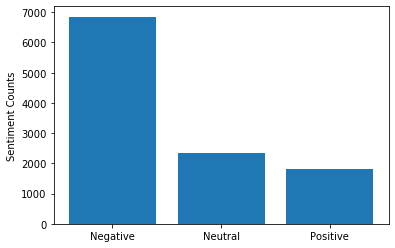

In [50]:
index = [1,2,3]
plt.bar(index, mood_count)
plt.xticks(index, ["Negative", "Neutral", "Positive"])
plt.ylabel("Sentiment Counts")
plt.show()

In [55]:
united = x_train[x_train['airline'] == 'United']
united

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)
5,569677636613439488,negative,United,NaN,bobgiolito,NaN,0,@united Why did you load us in this flying sar...,NaN,2015-02-22 17:58:27 -0800,"Los Angeles, CA",Pacific Time (US & Canada)
8,570116209263427584,negative,United,NaN,lindaSWC,NaN,1,@united frankly worse customer service ever. P...,NaN,2015-02-23 23:01:11 -0800,NaN,NaN
23,570055700790931456,negative,United,NaN,JeffPKirkland,NaN,0,@united computers are down but you stopped giv...,NaN,2015-02-23 19:00:44 -0800,Oregon,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
10964,569008708174262272,negative,United,NaN,johnwoodRTR,NaN,0,@united Also your at-gate monitor showed 23 em...,"[39.83426941, -104.69960636]",2015-02-20 21:40:22 -0800,Hong Kong,Eastern Time (US & Canada)
10965,570164810144481280,neutral,United,NaN,8629Fissile,NaN,0,@united Okay thank you,NaN,2015-02-24 02:14:18 -0800,NaN,London
10966,568417151176060929,negative,United,NaN,Brennej,NaN,0,"@united - vacation days: relevant, Ritz in PR ...",NaN,2015-02-19 06:29:44 -0800,NaN,NaN
10976,568564006329434113,positive,United,NaN,PaulBEsteves,NaN,0,@united thanks for the help. Wish the phone re...,NaN,2015-02-19 16:13:17 -0800,Brooklyn,Eastern Time (US & Canada)


In [35]:
x_train.isnull().sum()

tweet_id                      0
airline_sentiment             0
airline                       0
airline_sentiment_gold    10949
name                          0
negativereason_gold       10956
retweet_count                 0
text                          0
tweet_coord               10204
tweet_created                 0
tweet_location             3550
user_timezone              3577
dtype: int64

In [33]:
x_test.shape

(3660, 11)

In [14]:
X = x_train["text"]
Y = x_train["airline_sentiment"]

In [19]:
# Y = set(Y)
y_train = []
for i in Y:
    if i == "negative":
        y_train.append(0)
    elif i == "positive":
        y_train.append(1)
    else:
        y_train.append(2)
y_train[20:40]

[0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2]

In [20]:
Y[20:40]

20    negative
21     neutral
22    negative
23    negative
24    positive
25     neutral
26    negative
27    negative
28    positive
29    positive
30    negative
31    positive
32    negative
33    positive
34    negative
35    negative
36    negative
37    negative
38    negative
39     neutral
Name: airline_sentiment, dtype: object

In [7]:
X

0        @SouthwestAir I am scheduled for the morning, ...
1        @SouthwestAir seeing your workers time in and ...
2        @united Flew ORD to Miami and back and  had gr...
3           @SouthwestAir @dultch97 that's horse radish 😤🐴
4        @united so our flight into ORD was delayed bec...
                               ...                        
10975                              @AmericanAir followback
10976    @united thanks for the help. Wish the phone re...
10977    @usairways the. Worst. Ever. #dca #customerser...
10978    @nrhodes85: look! Another apology. DO NOT FLY ...
10979    @united you are by far the worst airline. 4 pl...
Name: text, Length: 10980, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
tc = count_vector.fit_transform(X)

In [61]:
count_vector.get_feature_names()

['00',
 '000',
 '000114',
 '000ft',
 '0011',
 '0016',
 '00a',
 '00am',
 '00p',
 '00pm',
 '01',
 '0162389030167',
 '0162431184663',
 '0167560070877',
 '0185',
 '01ldxn3qqq',
 '01pm',
 '02',
 '03',
 '0316',
 '0372389047497',
 '04',
 '0400',
 '05',
 '0510',
 '0530',
 '05am',
 '05pm',
 '06',
 '0600',
 '0671',
 '07',
 '0736',
 '0769',
 '07p',
 '07xhcacjax',
 '08',
 '0985',
 '0_0',
 '0cevy3p42b',
 '0hmmqczkcf',
 '0hxlnvzknp',
 '0jjt4x3yxg',
 '0jutcdrljl',
 '0kn7pjelzl',
 '0liwecasoe',
 '0prgysvurm',
 '0wbjawx7xd',
 '0xjared',
 '10',
 '100',
 '1000',
 '1000cost',
 '1007',
 '101',
 '1016',
 '1019',
 '1027',
 '103',
 '1030pm',
 '1032',
 '104',
 '1041',
 '1046',
 '105',
 '1050',
 '1051',
 '1058',
 '106',
 '1071',
 '1079871763',
 '108',
 '1080',
 '1081',
 '1086',
 '108639',
 '1089',
 '1098',
 '1099',
 '10a',
 '10am',
 '10d',
 '10f',
 '10hrs',
 '10m',
 '10mins',
 '10p',
 '10pm',
 '10th',
 '10tmthvfdc',
 '10voucherwhatajoke',
 '10x',
 '10x9x17',
 '10yr',
 '11',
 '110',
 '1102',
 '1106',
 '1108',
 '

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
Tfidf_Trans = TfidfTransformer()
Tfidf_tc = Tfidf_Trans.fit_transform(tc)

In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Tfidf_tc,y_train )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
new_word = x_test["text"]
tc_new_word = count_vector.transform(new_word)
a = model.predict(tc_new_word)

In [26]:
y_pred = []
for i in a:
    if i == 0:
        y_pred.append("negative")
    elif i == 0:
        y_pred.append("positive")
    elif i == 0:
        y_pred.append("neutral")

In [29]:
y_pred[0]

'negative'

In [31]:
import csv
with open('Twitter_test.csv', 'w') as f:
    for c in range(len(y_pred)):
        e = y_pred[c]
        f.write(str(e))
        f.write("\n")

In [32]:
import csv
with open('Twitter_test_new.csv', 'w') as f:
    for c in range(len(a)):
        e = a[c]
        f.write(str(e))
        f.write("\n")